<!-- Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown. -->

### Objective
### Regression 
### This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

### 1. Explore this dataset using what you have learned in data preprocessing and data visualization 

### 2. Write a paragraph selecting the most important features (feature selection). 

### 3. Split your dataset into a training set and a testing set. 

### 4. Apply linear regression to your training set. 

### 5. Plot the linear regression. 

### 6. Measure the performance of linear regression using the testing set. 

### 7. Apply multiple-linear regression and compare it to the linear model. 

### 8. Apply polynomial regression and compare it to linear and multilinear regression. 

### Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
house = pd.read_csv("C:\\Users\\anima\\Documents\\gomycode_assessments\\Datasets\\kc_house_data (1).csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Checking for missing values

In [3]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
house['waterfront'].nunique()

2

## Selecting Relevant Features

In [5]:
rel_ft = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
               'sqft_living15', 'sqft_lot15', 'price']]
rel_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [6]:
rel_ft['sqft_living'].nunique() # this is a numerical data

1038

In [7]:
rel_ft['sqft_lot'].nunique() # this is a numerical data

9782

In [8]:
rel_ft['bedrooms'].nunique() #this is categorical data

13

In [9]:
rel_ft['bathrooms'].nunique() #this is categorical

30

##Important Feature selection

In [10]:
rel_ft = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
               'sqft_living15', 'sqft_lot15', 'price']]
rel_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [11]:
#bedrooms is categorical
#bathrooms is categorical
#sqft_living is numerical
#sqft_lot is numerical
#floors is categorical
#waterfront is categorical
#view is categorical
#condition is categorical
#grade is categorical
#sqft_above is numerical
#sqft_babsemennt is numerical
#yr_built is categorical
#yr_renovated is categorical
#lat is numerical
#long is numerical
#sqft_living15 is numerical
#sqft_lot15 is numerical
#price is numerical

## Setting inputs and output

In [12]:
y = house['price']
x = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
               'sqft_living15', 'sqft_lot15']]


## Standardization

In [13]:
sc = StandardScaler()
trans = sc.fit_transform(rel_ft)


In [14]:
trans_df = pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,-0.381588


## Setting inputs and outputs fro the standardized data

In [15]:
x = trans_df.iloc[:, :-1]
y = trans_df.iloc[:, -1]

## Splitting data set into train and test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 30 )

##  Fitting Linear regression

In [17]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
target = linear_model.predict(x_test)

In [18]:
target

array([-0.5169813 , -0.3747341 , -0.34576108, ...,  0.91831183,
        0.22384736, -0.00547951])

In [19]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.2666089998843707
0.7133341028473469


## Linear regression for Sqft_lot

In [20]:
x_sqft_lot = trans_df.iloc[:, 3]
y_sqft_lot = trans_df.iloc[:, -1]

In [21]:
x_train_lot, x_test_lot, y_train_lot, y_test_lot = train_test_split(x_sqft_lot, y_sqft_lot, test_size = 0.2 , random_state = 30 )

In [22]:
x_train_lot = np.array(x_train_lot).reshape(-1,1)
x_test_lot = np.array(y_test_lot).reshape(-1,1)

In [23]:
len(x_train_lot) == len(y_train_lot)

True

In [24]:
lm = LinearRegression() # calling the linear regression function
lm.fit(x_train_lot, y_train_lot) #fitting input and output into linear regression
target = lm.predict(x_test_lot) #setting target using the .predict(x) function

In [25]:
print('MSE: ', mean_squared_error(y_test_lot, target))
print('R squared', metrics.r2_score(y_test_lot, target))

MSE:  0.779318527232446
R squared 0.16205362582034144


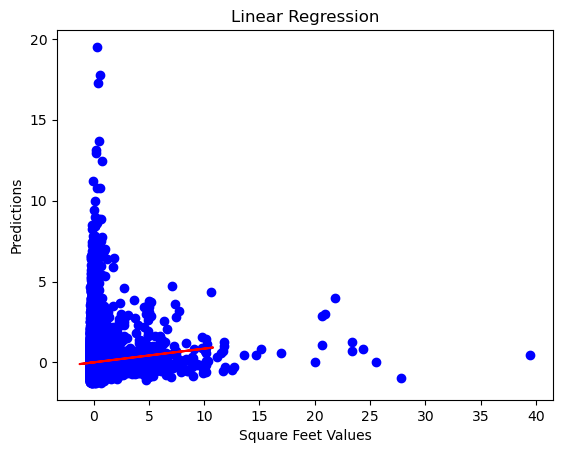

In [26]:
plt.scatter(x_sqft_lot, y_sqft_lot, color = 'blue')
plt.plot(x_test_lot, target, color = 'red')
plt.title('Linear Regression')
plt.xlabel('Square Feet Values')
plt.ylabel('Predictions')
plt.show()

## Linear Regression for Floors

In [27]:
x_sqft_fl = trans_df.iloc[:, 4]
y_sqft_fl = trans_df.iloc[:, -1]

In [28]:
x_train_fl, x_test_fl, y_train_fl, y_test_fl = train_test_split(x_sqft_fl, y_sqft_fl, test_size = 0.2 , random_state = 30 )

In [29]:
x_train_fl = np.array(x_train_fl).reshape(-1,1)
x_test_fl = np.array(y_test_fl).reshape(-1,1)

In [30]:
flr = LinearRegression()
flr.fit(x_train_fl, y_train_fl)
target_fl = flr.predict(x_test_fl)

In [31]:
print('MSE: ', mean_squared_error(y_test_fl, target_fl))
print('R squared', metrics.r2_score(y_test_fl, target_fl))

MSE:  0.5075547383326088
R squared 0.4542621048753017


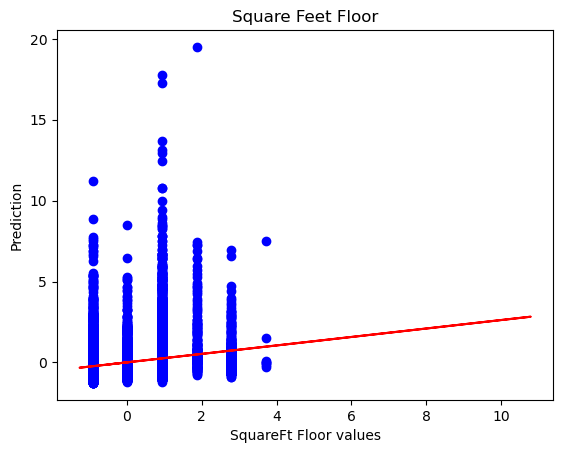

In [32]:
plt.scatter(x_sqft_fl, y_sqft_fl, color = 'blue')
plt.plot(x_test_fl, target_fl, color = 'red')
plt.title('Square Feet Floor')
plt.xlabel('SquareFt Floor values')
plt.ylabel('Prediction')
plt.show()

## Linear Regression for waterfall

In [33]:
x_wf = trans_df.iloc[:, 5]
y_wf = trans_df.iloc[:, -1]

In [34]:
x_train_wf, x_test_wf, y_train_wf, y_test_wf = train_test_split(x_wf, y_wf, test_size =0.2, random_state = 30)

In [35]:
x_train_wf = np.array(x_train_wf).reshape(-1,1)
x_test_wf = np.array(x_test_wf).reshape(-1,1)

In [36]:
wfr =LinearRegression()
wfr.fit(x_train_wf, y_train_wf)
target_wf = wfr.predict(x_test_wf)

In [37]:
print('MSE: ', mean_squared_error(y_test_wf, target_wf))
print('R squared', metrics.r2_score(y_test_wf, target_wf))

MSE:  0.8241198475933775
R squared 0.11388191856192209


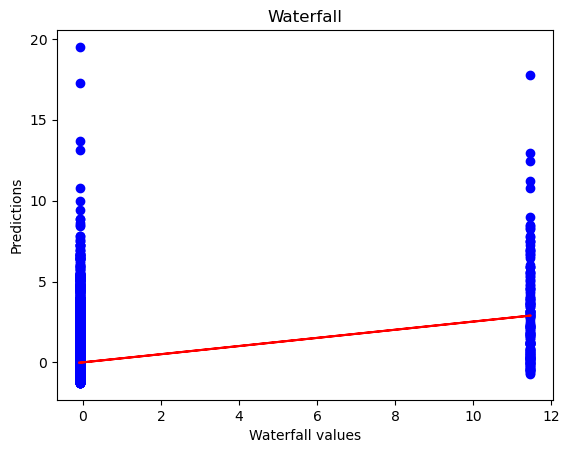

In [38]:
plt.scatter(x_wf, y_wf, color = 'blue')
plt.plot(x_test_wf, target_wf, color = 'red')
plt.title('Waterfall')
plt.xlabel('Waterfall values')
plt.ylabel('Predictions')
plt.show()

#  Polynimial Regression

In [303]:
LR = LinearRegression()
poly = PolynomialFeatures(degree = 4)

## Polynomial regression for Bedrooms

In [304]:
x_bed = trans_df.iloc[:, 0]
y_bed = trans_df.iloc[:, -1]

In [305]:
x_bed = np.array(x_bed).reshape(-1,1)
y_bed = np.array(y_bed).reshape(-1,1)

In [306]:
x_train_bed, x_test_bed, y_train_bed, y_test_bed = train_test_split(x_bed, y_bed, test_size = 0.2, random_state = 30)

In [307]:
poly_bedX = poly.fit_transform(x_train_bed)
LR.fit(poly_bedX, y_train_bed)

LinearRegression()

In [308]:
poly_pred = LR.predict(poly_bedX)

In [309]:
poly_bedXX = poly.fit_transform(x_test_bed)

In [310]:
poly_predT = LR.predict(poly_bedXX)

In [311]:
print(mean_squared_error(y_test_bed, poly_predT))
print(metrics.r2_score(y_test_bed, poly_predT))

0.8298149831718906
0.10775834002283102


In [312]:
len(x_train_bed) == len(y_train_bed)

True

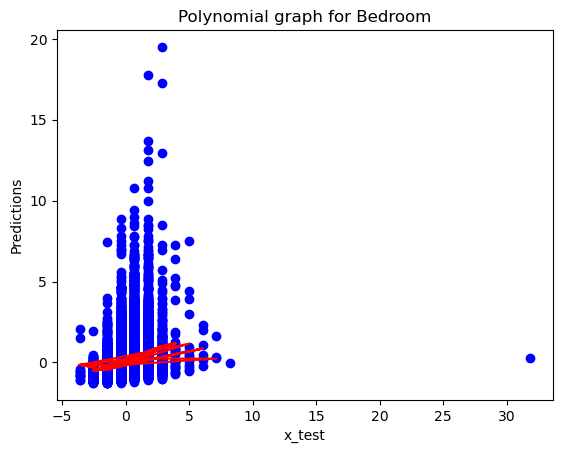

In [313]:
plt.scatter(x_bed, y_bed, color="blue")
plt.plot(x_test_bed, poly_predT, color = 'red')
plt.title('Polynomial graph for Bedroom')
plt.xlabel('x_test')
plt.ylabel('Predictions')
plt.show()

## polynomial regression for Square feet lot

In [314]:
x_lot = trans_df.iloc[:, 3].values.reshape(-1,1)
y_lot = trans_df.iloc[:, -1].values.reshape(-1,1)

In [315]:
x_train_lt, x_test_lt, y_train_lt, y_test_lt = train_test_split(x_lot, y_lot, test_size = 0.2, random_state = 30)

In [325]:
#poly_fit = poly_lot.fit_transform(x_train_lt,)
poly_lotX = poly.fit_transform(x_train_lt)

In [326]:
LR.fit(poly_lotX, y_train_lt)

LinearRegression()

In [327]:
predict_lot = LR.predict(poly_lot.fit_transform(x_test_lt))

In [328]:
print(mean_squared_error(y_test_lt, predict_lot))
print(metrics.r2_score(y_test_lt, predict_lot))

0.9015549771801589
0.03062137257977593


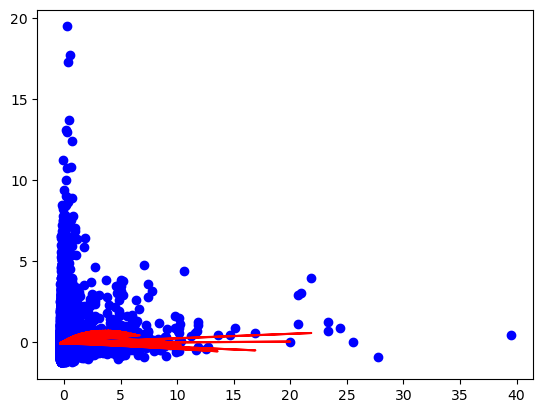

In [329]:
plt.scatter(x_lot, y_lot, color = 'blue')
plt.plot(x_test_lt, predict_lot, color = 'red')
plt.show()

## Comment: polynomial regression does not produce a good model for price predictions